In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('FY_2025_Hospital_Readmissions_Reduction_Program_Hospital.csv')
print(data.columns)
print(data.head())

Index(['Facility Name', 'Facility ID', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')
                     Facility Name  Facility ID State            Measure Name  \
0  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL       READM-30-AMI-HRRP   
1  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL      READM-30-CABG-HRRP   
2  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL        READM-30-HF-HRRP   
3  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL  READM-30-HIP-KNEE-HRRP   
4  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL        READM-30-PN-HRRP   

   Number of Discharges  Footnote  Excess Readmission Ratio  \
0                 296.0       NaN                    0.9483   
1                 151.0       NaN                    0.9509   
2                 681.0       NaN        

                      Facility Name  Facility ID State        Measure Name  \
0   SOUTHEAST HEALTH MEDICAL CENTER        10001    AL   READM-30-AMI-HRRP   
1   SOUTHEAST HEALTH MEDICAL CENTER        10001    AL  READM-30-CABG-HRRP   
2   SOUTHEAST HEALTH MEDICAL CENTER        10001    AL    READM-30-HF-HRRP   
4   SOUTHEAST HEALTH MEDICAL CENTER        10001    AL    READM-30-PN-HRRP   
5   SOUTHEAST HEALTH MEDICAL CENTER        10001    AL  READM-30-COPD-HRRP   
8          MARSHALL MEDICAL CENTERS        10005    AL    READM-30-HF-HRRP   
9          MARSHALL MEDICAL CENTERS        10005    AL    READM-30-PN-HRRP   
11         MARSHALL MEDICAL CENTERS        10005    AL  READM-30-COPD-HRRP   

    Number of Discharges  Excess Readmission Ratio  \
0                  296.0                    0.9483   
1                  151.0                    0.9509   
2                  681.0                    1.0597   
4                  490.0                    0.9715   
5                  130.0   

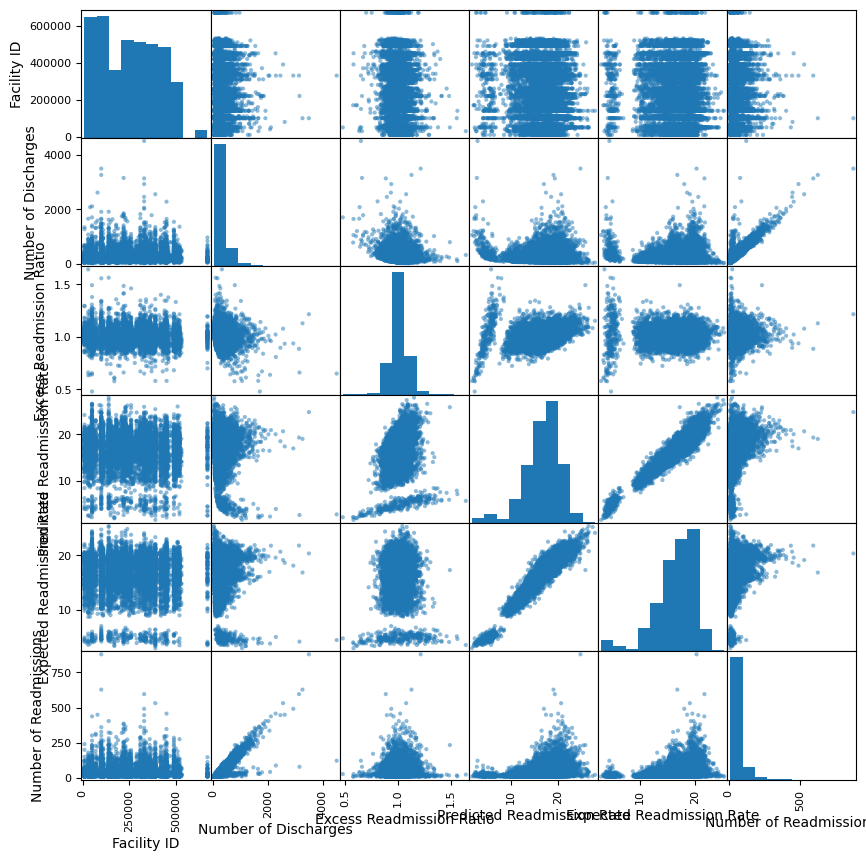

In [20]:
no_foot = data.drop(columns = ['Footnote'])
#looks like some rows like Number of Discharges are not plotting because they have NaN values for "too few to report" values
no_foot = no_foot.dropna()
no_foot['Number of Readmissions'] = no_foot['Number of Readmissions'].astype(float)
print(no_foot.head(8))
pd.plotting.scatter_matrix(no_foot.iloc[:,:], figsize = (10,10))
plt.show()
#I had to mess around with this a bunch to read those titles and then realized I could do it from the line above with data.head()

It looks like there is a very linear relationship between the predicted and expected readmission rate.
In Expected and Predicted Readmission rates there appear to be two distinct groups.

Of course we would expect no correlation between the ID number and anything else.

After playing with the data more there is also a very odd linear relationship between the Number of Discharges and Readmissions, it seems there are two 'linear paths'